# Student Stress Analysis using PySpark

In [1]:
# setting up 
#!pip install pyspark

In [2]:
#import pyspark
# always to satrt with a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('student').getOrCreate()
# read the dataset
df = spark.read.csv('Student Stress Factors.csv',inferSchema=True,header=True)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/05 23:38:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df.show()

+-------------------+---------------------------------+-------------------------------------------------+--------------------------------------------------+-----------------------------------+-----------------------------------------------------------------+--------------------------------------+
|          Timestamp|Kindly Rate your Sleep Quality 😴|How many times a week do you suffer headaches 🤕?|How would you rate you academic performance 👩‍🎓?|how would you rate your study load?|How many times a week you practice extracurricular activities 🎾?|How would you rate your stress levels?|
+-------------------+---------------------------------+-------------------------------------------------+--------------------------------------------------+-----------------------------------+-----------------------------------------------------------------+--------------------------------------+
|27/10/2023 21:54:15|                                3|                                                1|      

In [4]:
df.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Kindly Rate your Sleep Quality 😴: integer (nullable = true)
 |-- How many times a week do you suffer headaches 🤕?: integer (nullable = true)
 |-- How would you rate you academic performance 👩‍🎓?: integer (nullable = true)
 |-- how would you rate your study load?: integer (nullable = true)
 |-- How many times a week you practice extracurricular activities 🎾?: integer (nullable = true)
 |-- How would you rate your stress levels?: integer (nullable = true)



In [5]:
df.describe().show()

23/11/05 23:38:46 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+---------------------------------+-------------------------------------------------+--------------------------------------------------+-----------------------------------+-----------------------------------------------------------------+--------------------------------------+
|summary|          Timestamp|Kindly Rate your Sleep Quality 😴|How many times a week do you suffer headaches 🤕?|How would you rate you academic performance 👩‍🎓?|how would you rate your study load?|How many times a week you practice extracurricular activities 🎾?|How would you rate your stress levels?|
+-------+-------------------+---------------------------------+-------------------------------------------------+--------------------------------------------------+-----------------------------------+-----------------------------------------------------------------+--------------------------------------+
|  count|                 53|                               53|                        

/Users/zhangbobby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhangbobby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhangbobby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zhangbobby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

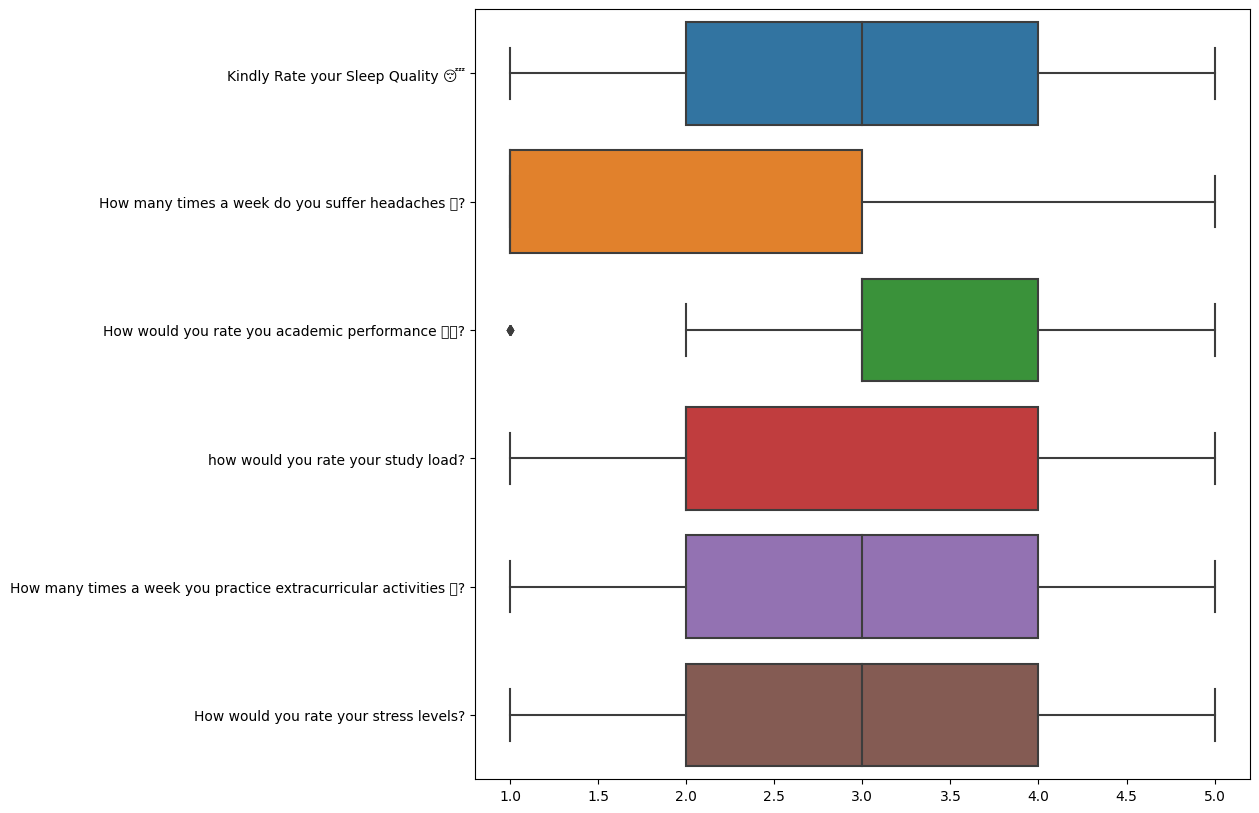

In [6]:
# EDA of the data
# check the correlation between the variables
from pyspark.sql.functions import corr
# boxplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=df.toPandas(),orient='h')
plt.show()


In [7]:
# check the correlation between the variables
df.select(corr('How would you rate your stress levels?','how would you rate your study load?')).show()
df.select(corr('Kindly Rate your Sleep Quality 😴','How many times a week do you suffer headaches 🤕?')).show()
df.select(corr('Kindly Rate your Sleep Quality 😴','How many times a week you practice extracurricular activities 🎾?')).show()


+---------------------------------------------------------------------------------+
|corr(How would you rate your stress levels?, how would you rate your study load?)|
+---------------------------------------------------------------------------------+
|                                                               0.3412321127385092|
+---------------------------------------------------------------------------------+

+------------------------------------------------------------------------------------------+
|corr(Kindly Rate your Sleep Quality 😴, How many times a week do you suffer headaches 🤕?)|
+------------------------------------------------------------------------------------------+
|                                                                        0.0273030029441102|
+------------------------------------------------------------------------------------------+

+----------------------------------------------------------------------------------------------------------+
|corr(

In [8]:
spark.stop()